# The Simulation of Waves in a Constant and Varying Medium
## Zain Fox-Latif | 21018444

This assignment explores computational methods to plot a wave first at a stationary position, then progressing the wave by displacing it in time. The wave in question is described by the 1D wave equation

$$ 
\begin{equation}
\frac{\partial^2\theta}{\partial t^2}=c(x)^2\frac{\partial^2\theta}{\partial x^2} 
\end{equation}
$$

where $c(x)=c/n(x)$ and $n(x)$ corresponds to the refractive index that varies with position. For the first part of this assignment, $n(x)$ is changed in a range of values of $x$, while the second part does the same but instead varies $n(x)$ smoothly in the same range. The wave update equation below (used to calculate the progression of the wave) takes the form

$$
\begin{equation}
\theta_{i,n+1}=2(1-r^2)\theta_{i,n}-\theta_{i,n-1}+r^2\left[\theta_{i+1,n}+\theta_{i-1,n}\right]
\end{equation}
$$

and is written out below in the function.

In [2]:
# Appropriate imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### 1. Set up the wave equation update



In [2]:
def explicit_wave_eq_update(theta_n, theta_nm1,r):
   """
   Calculates values for theta at timestep t+1 given
   values for theta at timesteps t and t-1

   Inputs: 
   theta_n   Wave at time t_n     = n*dt
   theta_nm1 Wave at time t_{n-1} = (n-1)*dt
   r         Constant (c dt/dx)

   Output:
   theta at time t_{n+1} = (n+1)*dt 
   """
   theta_n[0] = 0
   theta_n[-1] = 0 
   theta_np1 = 2*(1-r**2)*theta_n - theta_nm1 + r**2 * (np.roll(theta_n, 1) + np.roll(theta_n, -1))
   return theta_np1

Given the ability of numpy arrays to 'broadcast' onto other arrays with equal dimensionality, no changes were required to be made to my function from the week 6 exercises.

### 2. Set up the wave, arrays and initial conditions

In [3]:
# Constants
wavelength = 1
wavevector = 2*np.pi/wavelength
ang_freq = 2*np.pi

# Defining number of points and factor r
N = 1000
mult = 5 # Number of wavelengths
r = 0.3*np.ones(mult*N)

# Varying r in the range of 2 to 3 wavelengths
r[2*N+1:3*N] = 0.15

# Defining coordinate space
dx = wavelength/N
dt = r[0] * dx
x = np.arange(0,5,dx)

### 3. Run the solver, storing the results, and plot

Text(0, 0.5, 'y')

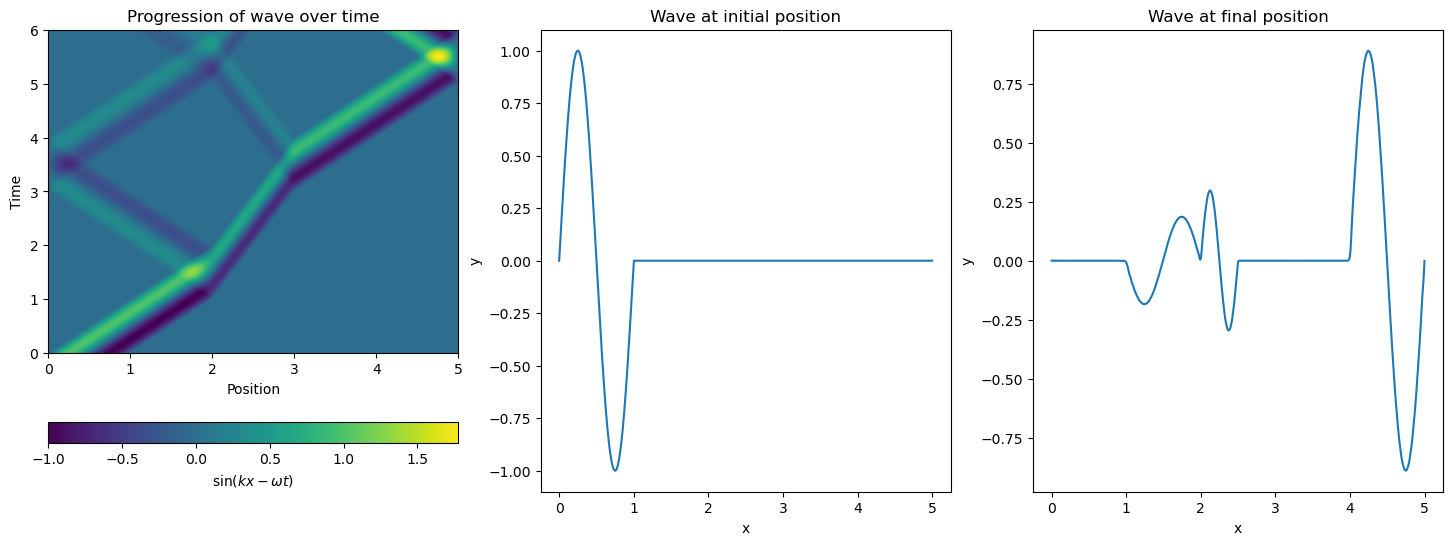

In [4]:
# Values of theta at first and second timestep
t = 0
theta_0 = np.sin(wavevector*x)
t += dt
theta_1 = np.sin(wavevector*x - ang_freq*t)

# Restricting initial wave to one wavelength
theta_0[N:] = 0.0
theta_1[N:] = 0.0

# Running for 300 steps
iters = 20*N

# Storing values of theta for imshow
store_theta = np.zeros(( iters, mult*N ))
store_theta[0] = theta_0
store_theta[1] = theta_1

for n in range(1,iters-1):
    # Using function from earlier to update theta
    store_theta[n+1] = explicit_wave_eq_update(store_theta[n], store_theta[n-1], r)


fig1 = plt.figure(figsize=(18,6))
ax1 = fig1.add_subplot(1,3,1)
im1 = ax1.imshow(store_theta, origin='lower', extent=(0,5,0,dt*iters), aspect='auto')
ax1.set_title("Progression of wave over time")
ax1.set_xlabel("Position")
ax1.set_ylabel("Time")
plt.colorbar(im1, location='bottom', orientation='horizontal', label=r'$\sin(kx - \omega  t)$')

ax2 = fig1.add_subplot(1,3,2)
ax2.plot(x, store_theta[0])
ax2.set_title("Wave at initial position")
ax2.set_xlabel("x")
ax2.set_ylabel("y")

ax3 = fig1.add_subplot(1,3,3)
ax3.plot(x, store_theta[-1])
ax3.set_title("Wave at final position")
ax3.set_xlabel("x")
ax3.set_ylabel("y")

When plotting the imshow, a horizontal slice at time $t$ can be thought of as the stae of the wave at said $t$. Thus, the changing position can be viewed by viewing the ensemble of these horizontal cuts, as is presented in the plot. 

#### 3.1 3D plot

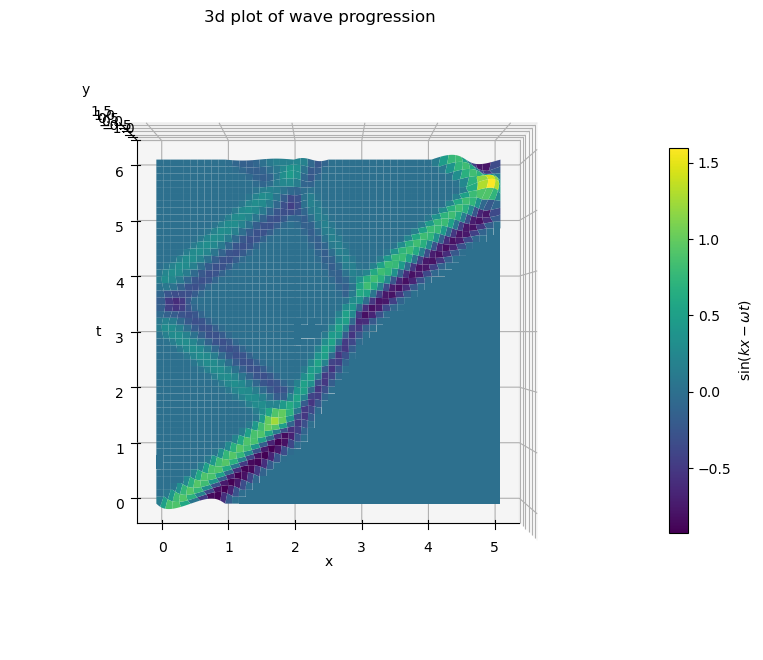

In [5]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax3d = fig.add_subplot(111, projection='3d')
x2D, y2D = np.meshgrid(x, range(iters)*dt)
surf = ax3d.plot_surface(x2D, y2D, store_theta, cmap='viridis')
ax3d.view_init(90,270)
ax3d.set_title("3d plot of wave progression")
ax3d.set_xlabel("x")
ax3d.set_ylabel("t")
ax3d.set_zlabel("y")
fig.colorbar(surf, shrink=0.5, label=r'$\sin(kx - \omega  t)$')

#### 3.2 2D subplots

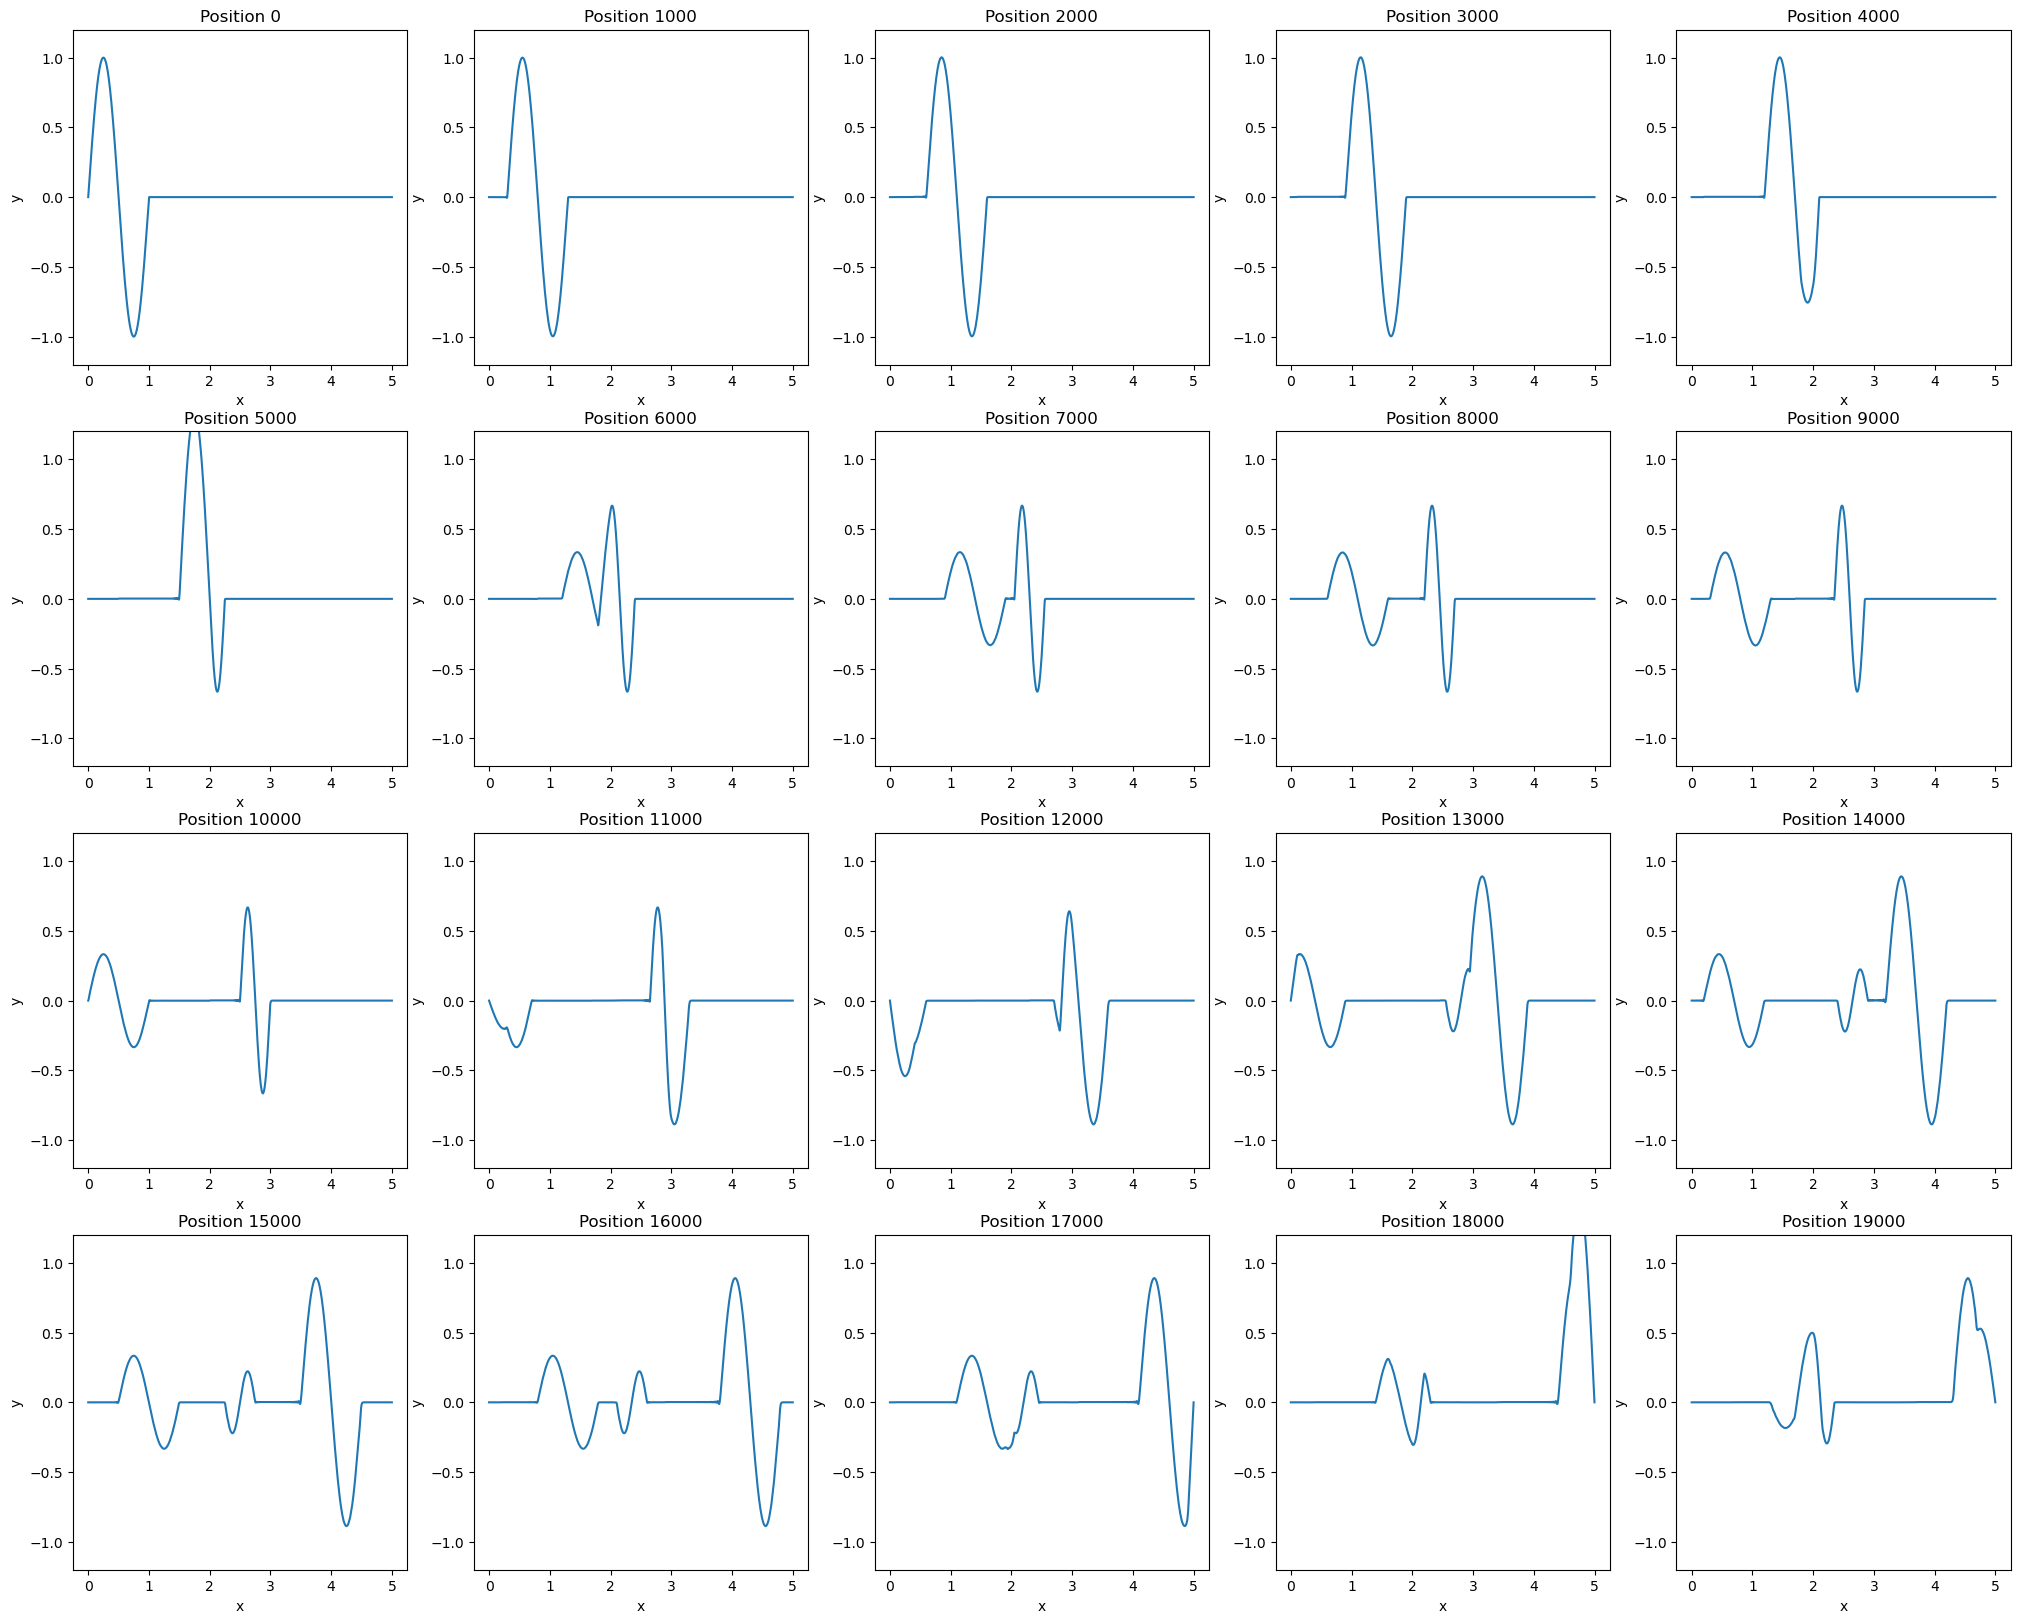

In [6]:
fig_parts = plt.figure(figsize=(25,20))
rows = 4
cols = 5
num  = rows*cols
step = int(iters/num)

for i in range(1,num+1):
    ax = fig_parts.add_subplot(rows, cols, i)
    ax.plot(x, store_theta[(i-1)*step])
    ax.set_ylim((-1.2,1.2)) 
    ax.set_title("Position {}".format((i-1)*step))
    ax.set_xlabel("x")
    ax.set_ylabel("y")

The wave shows signs of reflection at each boundary. Additionally, there appears to be some refraction as the wave enters and exits the medium. As the wave is reflected at each boundary, it becomes fainter, which is indicative of a decrease in intensity. We expect this, as if the total intensity of the wave before and after entering the boundary is to remain constant due to the law of the conservation of energy, the transmitted and the reflected wave must both be slightly fainter after the wave enters the boundary.

### 4. Varying refractive index

Using a similar approach from earlier, $n(x)$ was varied through the formula

$$ n(x) = 0.1 \cos \left( 2 \pi \frac{(x-2\lambda)}{\lambda} \right)  +0.2$$

which facilitated a smooth decrease from $r = 0.3$ to $r = 0.1$ The wave was then plotted as it crossed the boundary, and the respective imshow and 3d plots were rendered. The equation above is an altered version of the equation in the specification, altered specifically to meet the requirements of a smooth decrease and increase of $r$.

Text(0, 0.5, 'y')

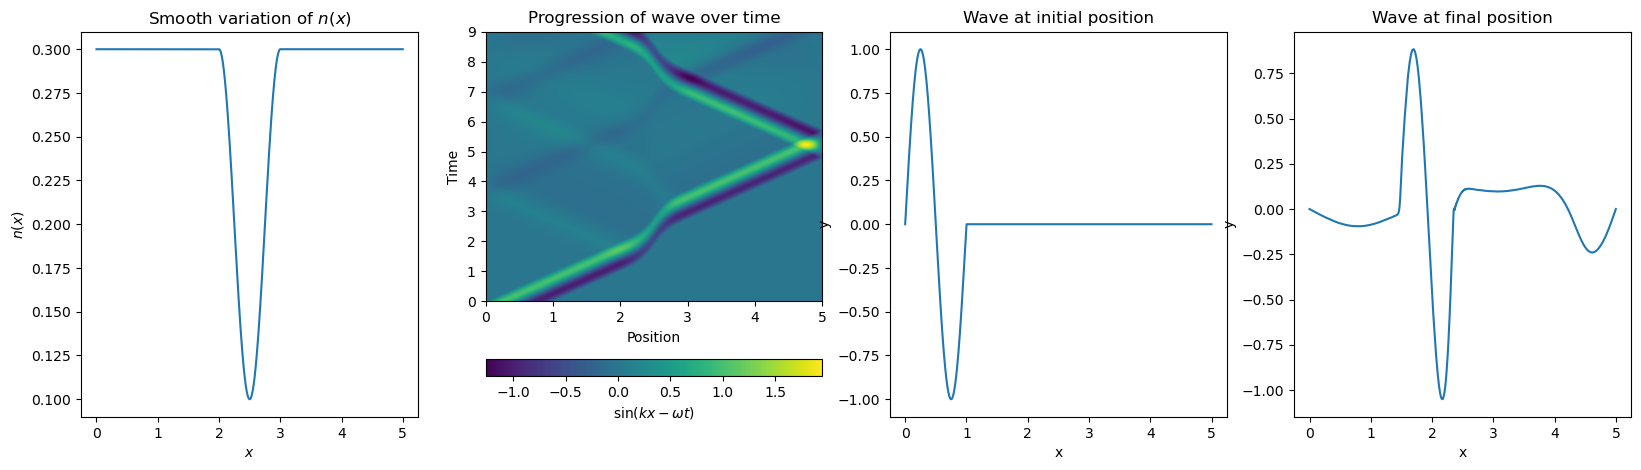

In [7]:
t = 0
theta_0v = np.sin(wavevector*x)
t += dt
theta_1v = np.sin(wavevector*x - ang_freq*t)
# Restrict initial wave to one wavelength
theta_0v[N:] = 0.0
theta_1v[N:] = 0.0
# Set up rv
rv = 0.3*np.ones(mult*N)
rv[2*N+1:3*N] = 0.1*(np.cos(2*np.pi*(x[2*N+1:3*N] - 2))) + 0.2
# Run for 600 steps
iters = 30*N

store_thetav = np.zeros(( iters, 5*N ))
store_thetav[0] = theta_0v
store_thetav[1] = theta_1v

for n in range(1, iters-1):
    store_thetav[n+1] = explicit_wave_eq_update(store_thetav[n], store_thetav[n-1], rv)

fig2 = plt.figure(figsize=(20,5))

ax1 = fig2.add_subplot(1,4,1)
ax1.plot(x,rv)
ax1.set_title(r"Smooth variation of $n(x)$")
ax1.set_xlabel(r"$x$")
ax1.set_ylabel(r"$n(x)$")

ax2 = fig2.add_subplot(1,4,2)
im2 = ax2.imshow(store_thetav, origin='lower', extent=(0,5,0,dt*iters), aspect='auto')
ax2.set_title("Progression of wave over time")
ax2.set_xlabel("Position")
ax2.set_ylabel("Time")
plt.colorbar(im2, location='bottom', orientation='horizontal', label=r'$\sin(kx - \omega  t)$')

ax3 = fig2.add_subplot(1,4,3)
ax3.plot(x, store_thetav[0])
ax3.set_title("Wave at initial position")
ax3.set_xlabel("x")
ax3.set_ylabel("y")

ax4 = fig2.add_subplot(1,4,4)
ax4.plot(x, store_thetav[-1])
ax4.set_title("Wave at final position")
ax4.set_xlabel("x")
ax4.set_ylabel("y")


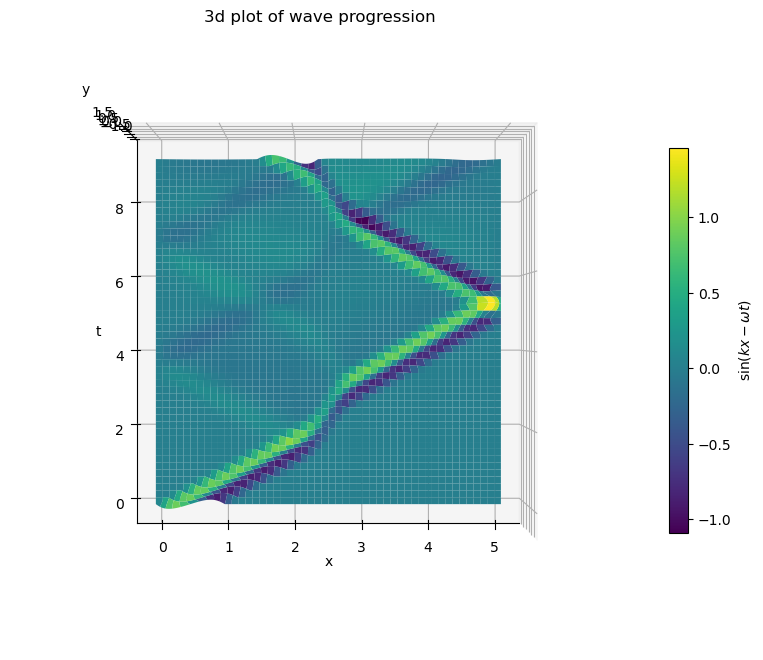

In [8]:
fig_3d3 = plt.figure(figsize=(10,10))
ax3d3 = fig_3d3.add_subplot(111,projection='3d')
x2D, y2D = np.meshgrid(x, range(iters)*dt)
surf = ax3d3.plot_surface(x2D, y2D, store_thetav, cmap='viridis')
ax3d3.view_init(90,270)
ax3d3.set_title("3d plot of wave progression")
ax3d3.set_xlabel("x")
ax3d3.set_ylabel("t")
ax3d3.set_zlabel("y")
fig.colorbar(surf, shrink=0.5, label=r'$\sin(kx - \omega  t)$')

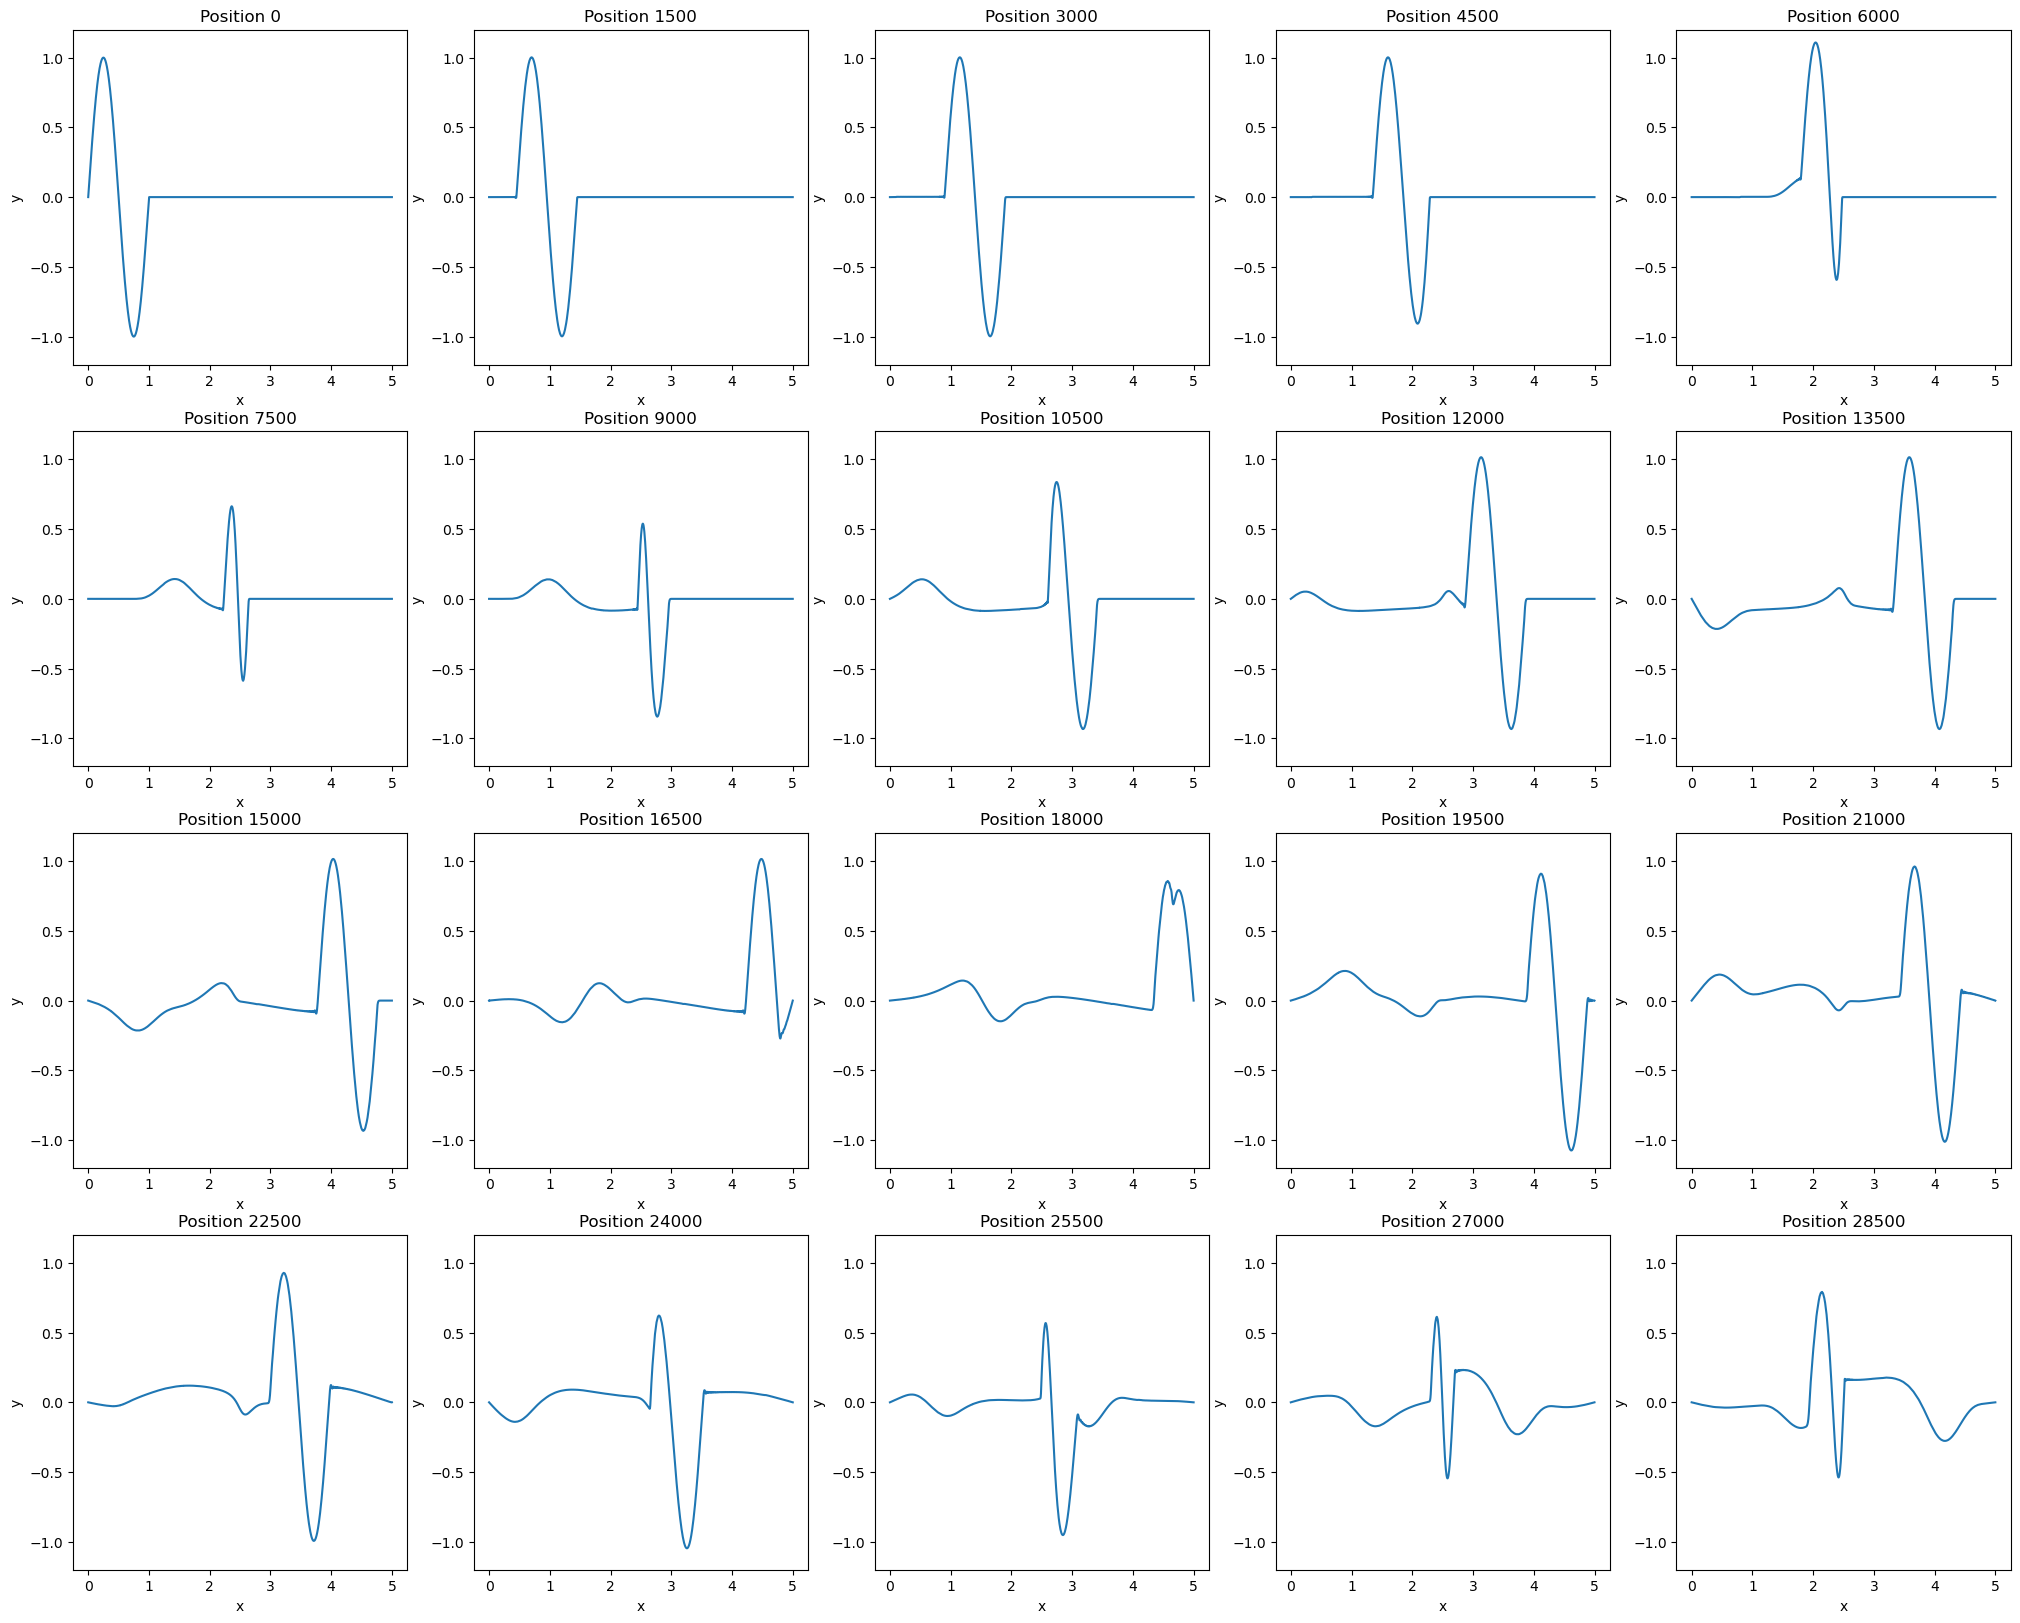

In [9]:
fig_parts = plt.figure(figsize=(25,20))
rows = 4
cols = 5
num  = rows*cols
step = int(iters/num)

for i in range(1,num+1):
    ax = fig_parts.add_subplot(rows, cols, i)
    ax.plot(x, store_thetav[(i-1)*step])
    ax.set_ylim((-1.2,1.2)) 
    ax.set_title("Position {}".format((i-1)*step))
    ax.set_xlabel("x")
    ax.set_ylabel("y")

As can be seen by the plots above, the wave exhibits some strange behaviour when compared to the plots of the constant boundary. This makes sense intuitively, since the varying boundary should give rise to a reflected wave with a different shape than with the constant boundary. Nonetheless, phenomena like reflection and refraction can be observed in this situation.

## Conclusion
In this assignment, clear observations were made on the nature of waves when exiting and entering media. Both scenarios with variations made to the nature of the boundary painted a clear picture of how a wave can be transmitted and reflected at a boundary, with the wave itself experiencing deformation after meeting the boundary.